### **0. Setup**

In [1]:
import os, glob, warnings
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ignore warnings
warnings.filterwarnings('ignore')

# plotting configuration
font = {'family': 'Arial', 'size': 15}
mpl.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'
# my_pal = ['grey', 'mediumseagreen', 'dodgerblue']
# my_pal = ['grey', 'dodgerblue']
my_pal = ['grey', 'mediumseagreen', 'mediumblue', 'darkorange']

# set the directory where the data files are awaiting
directory = '/Users/ShokenLEE/Desktop/DATA/2022 7-9/8-25-22 P-218 AH-NLS DGAT1,2/DGAT1'

### **1. Concanatate all the CSV files**

In [2]:
df = pd.DataFrame()

for path, subdirs, files in os.walk(directory):
    for file in files:
        if file.endswith('csv'):
            _df = pd.read_csv(os.path.join(path, file))
            df = pd.concat([df, _df], axis=0)

In [3]:
df.head()
# df.tail()

,,FileName,Mean_whole,Mean_internal,Mean_periphery,Ratio
0,1,8-25-22 U2OSctr AH-NG-NLS F-DGAT1 HA 488mNG t1...,258.032,93.460,315.830,3.379
1,2,8-25-22 U2OSctr AH-NG-NLS F-DGAT1 HA 488mNG t1...,141.978,21.389,64.679,3.024
2,3,8-25-22 U2OSctr AH-NG-NLS F-DGAT1 HA 488mNG t1...,175.077,43.668,142.107,3.254
0,1,8-25-22 U2OSctr AH-NG-NLS F-DGAT1 HA 488mNG t1...,376.486,160.442,596.480,3.718
1,2,8-25-22 U2OSctr AH-NG-NLS F-DGAT1 HA 488mNG t1...,228.820,88.291,254.071,2.878


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 5
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   59 non-null     int64  
 1   FileName        59 non-null     object 
 2   Mean_whole      59 non-null     float64
 3   Mean_internal   59 non-null     float64
 4   Mean_periphery  59 non-null     float64
 5   Ratio           59 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 3.2+ KB


### **2. Add columns**

####  **Drug**

In [5]:
# df.loc[df['FileName'].str.contains('DMSO'), 'Drug'] = 'DMSO'
# df.loc[df['FileName'].str.contains('pra'), 'Drug'] = 'Propranolol'

####  **siRNA**

In [6]:
df.loc[df['FileName'].str.contains('siCtrl'), 'siRNA'] = 'siCtrl'
df.loc[df['FileName'].str.contains('CTDNEP1'), 'siRNA'] = 'siCTDNEP1'
df.loc[df['FileName'].str.contains('Lpin1'), 'siRNA'] = 'siLpin1'
df.loc[df['FileName'].str.contains('NEP1R1'), 'siRNA'] = 'siNEP1R1'

####  **Plasmids**

In [5]:
df.loc[df['FileName'].str.contains('WT'), 'Plasmid'] = 'WT'
df.loc[df['FileName'].str.contains('HA'), 'Plasmid'] = 'HA'

### **3. Cleaning**

####  **Drop zero value rows**

In [6]:
df_not_zero = df[df['Mean_whole'] !=0]

In [7]:
df_not_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 5
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0                   58 non-null     int64  
 1   FileName        58 non-null     object 
 2   Mean_whole      58 non-null     float64
 3   Mean_internal   58 non-null     float64
 4   Mean_periphery  58 non-null     float64
 5   Ratio           58 non-null     float64
 6   Plasmid         58 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ KB


### **4. Analysis**

#### **4-0. Quick check of the # of cells and mean values of NE enrichment score**

#### Number of cells

In [8]:
df_not_zero.groupby(['Plasmid']).size()

Plasmid
HA    17
WT    41
dtype: int64

#### NE enrichment score - Mean

In [23]:
df_not_zero.groupby(['siRNA'])['Ratio'].mean()

siRNA
siCTDNEP1    1.382442
siCtrl       1.929478
siLpin1      1.631267
siNEP1R1     1.588377
Name: Ratio, dtype: float64

#### **4-1. Graphs**

#### **Number of cell counts per sample**

No handles with labels found to put in legend.


[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

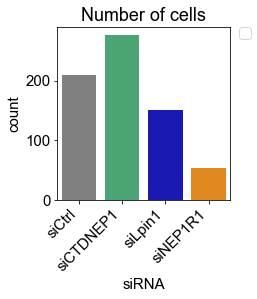

In [13]:
fig_width, fig_height = 3.0, 3.0
fig = plt.figure(figsize=(fig_width,fig_height))
ax_count = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_count = sns.countplot(data=df_not_zero, x='siRNA', 
                         order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Number of cells')
ax_count.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

#### **NE enrichment score**

#### Box plot

[Text(0, 0, 'WT'), Text(1, 0, 'HA')]

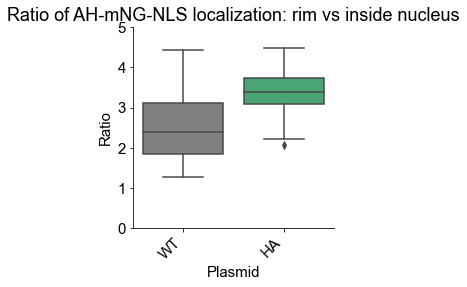

In [10]:
fig = plt.figure(figsize=(3.5,3.5))
ax_box = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Ratio', 
#                      order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
ax_box = sns.boxplot(data=df_not_zero, x='Plasmid', y='Ratio', order=['WT', 'HA'], palette=my_pal)
# ax_box = sns.boxplot(data=df_not_zero, x='Drug', y='Ratio', order=['DMSO', 'Propranolol'], palette=my_pal)

plt.title('Ratio of AH-mNG-NLS localization: rim vs inside nucleus')
plt.ylabel('Ratio')
plt.ylim([0,5])

ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)

# ax_box.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')
# ax_box.set_xticklabels(labels=['DMSO', 'Propranolol'], rotation=45, ha='right')
ax_box.set_xticklabels(labels=['WT', 'HA'], rotation=45, ha='right')

In [11]:
fig.savefig(directory + '/NEenrichScore_box.pdf', bbox_inches='tight', transparent=True)

#### Displot

Text(0.5, 1.0, 'Ratio of DAG sensor localization: Nuclear rim vs intra-nucleus')

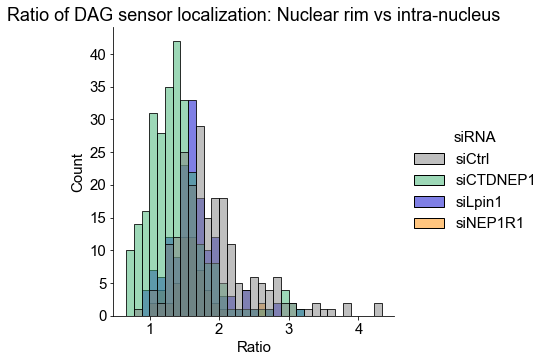

In [11]:
hist = sns.displot(data=df_not_zero, x='Ratio', 
                   hue='siRNA', hue_order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: Nuclear rim vs intra-nucleus')

#### Violin plot

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

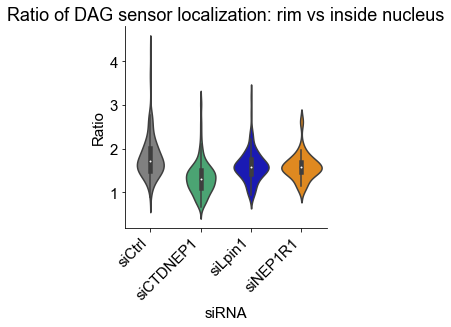

In [56]:
fig = plt.figure(figsize=(3.5,3.5))
ax_vio = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_vio = sns.violinplot(data=df_not_zero, x='siRNA', y='Ratio', order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('Ratio of DAG sensor localization: rim vs inside nucleus')
plt.ylabel('Ratio')
ax_vio.spines['top'].set_visible(False)
ax_vio.spines['right'].set_visible(False)
ax_vio.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

In [20]:
fig.savefig(directory + '/Ratio_violin.jpg', bbox_inches='tight')

#### **Overall mean intensity in nucleus**

[Text(0, 0, 'siCtrl'),
 Text(1, 0, 'siCTDNEP1'),
 Text(2, 0, 'siLpin1'),
 Text(3, 0, 'siNEP1R1')]

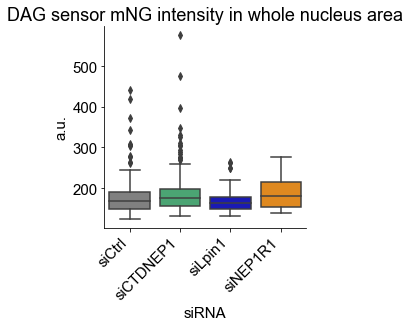

In [18]:
fig = plt.figure(figsize=(3.5,3.5))
ax_box = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax_box = sns.boxplot(data=df_not_zero, x='siRNA', y='Mean_whole', 
                     order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], palette=my_pal)
plt.title('DAG sensor mNG intensity in whole nucleus area')
plt.ylabel('a.u.')
ax_box.spines['top'].set_visible(False)
ax_box.spines['right'].set_visible(False)
ax_box.set_xticklabels(labels=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], rotation=45, ha='right')

In [23]:
fig.savefig(directory + '/Mean_whole.pdf', bbox_inches='tight', transparent=True)

#### **Correlation b/w whole mean intensity and NE enrichment score**

#### Limited to those with mean_whole less than 300

(124.653, 300.0)

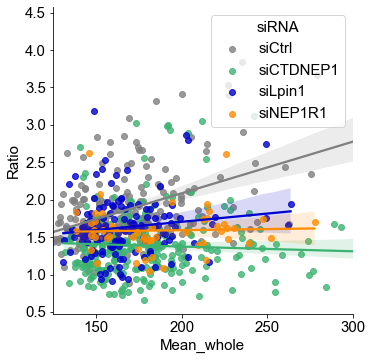

In [19]:
scatter = sns.lmplot(x='Mean_whole', y='Ratio', data=df_not_zero, 
                     hue='siRNA', hue_order=['siCtrl', 'siCTDNEP1', 'siLpin1', 'siNEP1R1'], 
                     palette=my_pal, legend_out=False)

min = np.min(df_not_zero['Mean_whole'])
plt.xlim([min,300])

In [25]:
scatter.savefig(directory + '/Mean_vs_Ratio_scatter.jpg', bbox_inches='tight')

#### **Tukey HSD test**

In [20]:
res = pairwise_tukeyhsd(df['Ratio'], df['siRNA'], alpha=0.05)

In [21]:
print(res)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj   lower   upper  reject
---------------------------------------------------------
siCTDNEP1   siCtrl   0.6251  0.001  0.4932  0.7571   True
siCTDNEP1  siLpin1   0.3505  0.001  0.2037  0.4974   True
siCTDNEP1 siNEP1R1    0.077 0.7413 -0.1276  0.2816  False
   siCtrl  siLpin1  -0.2746  0.001 -0.4313 -0.1179   True
   siCtrl siNEP1R1  -0.5481  0.001 -0.7599 -0.3364   True
  siLpin1 siNEP1R1  -0.2735 0.0083 -0.4949 -0.0522   True
---------------------------------------------------------
